ROW 1

    1. import library yang dibutuhkan -> panda, numpy, dan sklearn
    2. inisiasi array yang menampung data pada iris dataset -> FEATURE_NAMES
    3. variabel iris menampung file csv
    4. variabel x menampung tabel yang berisi array dari FEATURES_NAMES
    5. variabel y menampung kolom variety pada file iris.csv yang mana nilainya telah dirubah (diberi label) -> setosa = 0, versicolor = 1, virginica = 2

In [1]:
import pandas as pan
import numpy as np
from sklearn import preprocessing

FEATURE_NAMES = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

iris = pan.read_csv("iris.csv")

x = pan.DataFrame(iris, columns = FEATURE_NAMES)

variasi = preprocessing.LabelEncoder()
variasi.fit(iris.variety)

y = variasi.transform(iris.variety)

ROW 2

menampilkan nilai x

In [2]:
x[:150]

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


ROW 3

menampilkan nilai y

In [3]:
y[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

ROW 4

membagi data set dan data test

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.35, random_state = 6218009)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape, y_test.shape)

Train set: (97, 4) (97,)
Test set: (53, 4) (53,)


ROW 5

inisiasi klasifikasi menggunakan model pohon entropy dengan kedalaman 3 -> model1

In [5]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

ROW 6

membuat grafik pohon yang sudah diinisiasikan pada ROW 5

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(model1, 'tree1', feature_names = FEATURE_NAMES)

ROW 7

mengubah format file menjadi format .png

In [7]:
!dot -T png tree1 -o tree1.png

ROW 8

membuat design untuk menampilkan gambar pohon

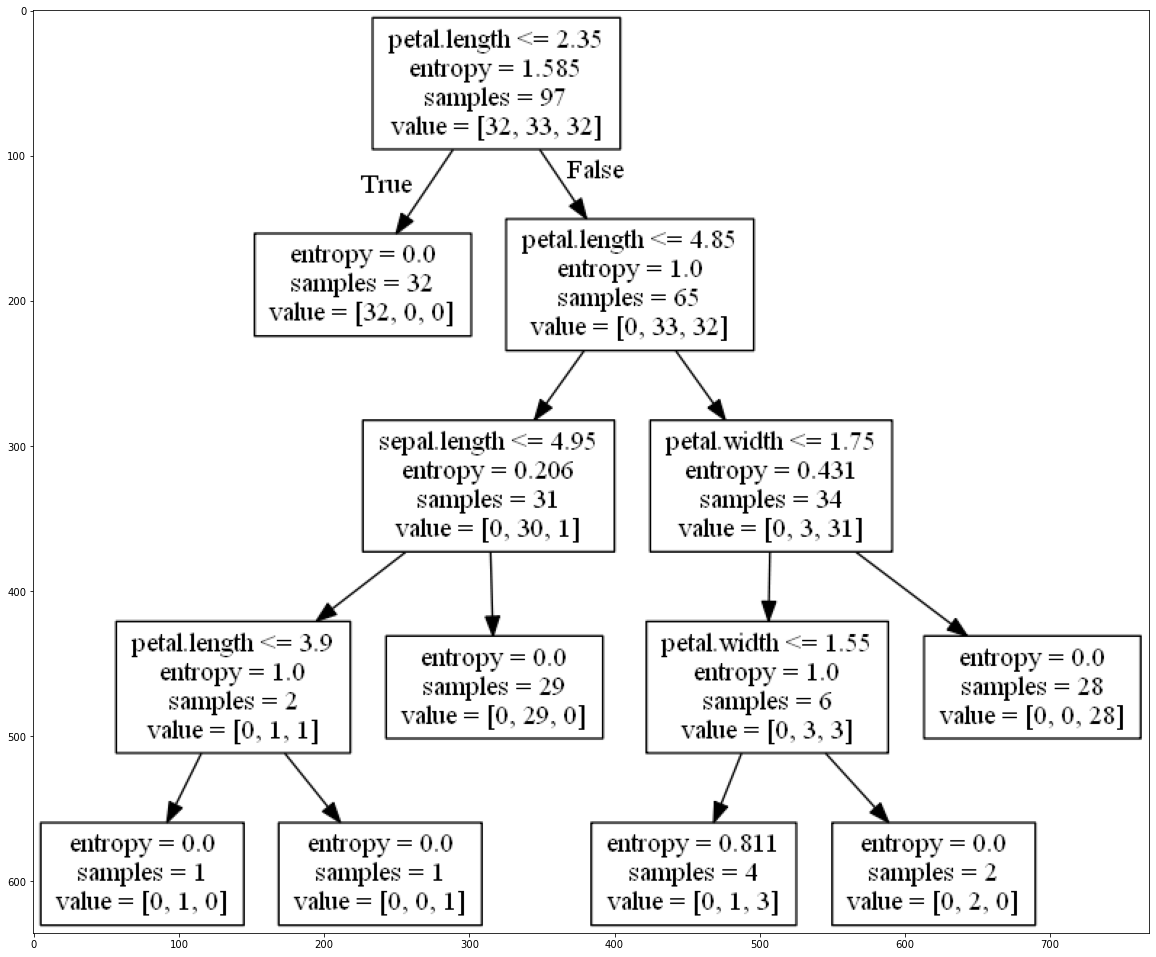

In [8]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree1.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

ROW 9

predictedTree1 adalah variabel yang menampung hasil perhitungan prediksi

In [9]:
predictedTree1 = model1.predict(x_test)

ROW 10

menampilkan predictedTree1, hanya untuk mengecek

In [10]:
predictedTree1

array([0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 2, 0, 2])

ROW 11

menampilkan y_test, hanya untuk mengecek

In [11]:
y_test

array([0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 1, 1, 2, 0, 2])

ROW 12

menghitung tingkat akurasi

In [12]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictedTree1)

0.9245283018867925

ROW 13

menampilkan report perhitungan precision, recall, dan f1

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictedTree1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.84      0.94      0.89        17
           2       0.94      0.83      0.88        18

    accuracy                           0.92        53
   macro avg       0.93      0.92      0.92        53
weighted avg       0.93      0.92      0.92        53

